In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [17]:
df = pd.read_csv('temperature_data_processed.csv')
df['date']= pd.to_datetime(df["date"], format="%Y%m%d")
df = df[df['temp'] != -999]
df

,stationid,temp,date,time
0,3,-5.6,1891-01-01,7
1,3,-0.7,1891-01-01,14
2,3,-4.0,1891-01-01,21
3,3,-5.2,1891-01-02,7
4,3,-1.0,1891-01-02,14
...,...,...,...,...
6972476,15526,7.4,1935-12-30,14
6972477,15526,7.0,1935-12-30,20
6972478,15526,7.0,1935-12-31,8
6972479,15526,8.2,1935-12-31,14


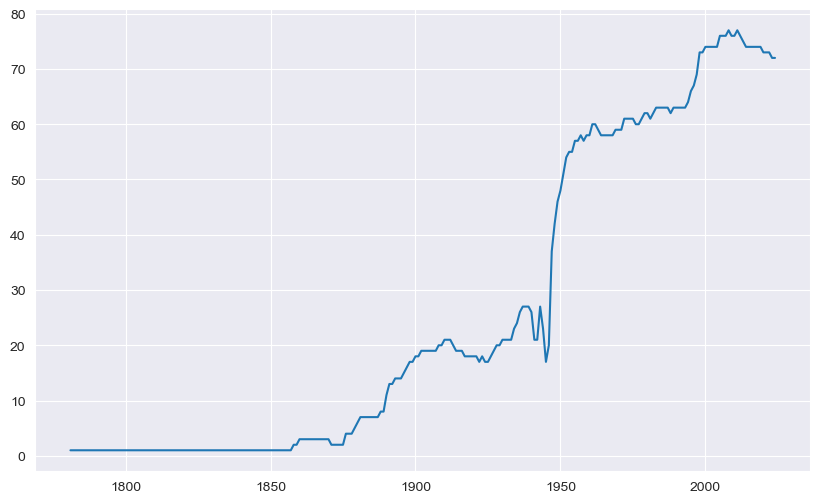

In [18]:
#t YYYYMMDD
df['year'] = df['date'].dt.year
stations_per_year = df.groupby('year')['stationid'].nunique()
stations_per_year = stations_per_year.reset_index()


fig = plt.figure( figsize = (10,6) )
ax = plt.subplot(1,1,1)
ax.plot(stations_per_year['year'], stations_per_year['stationid'])

In [19]:
df['year'] = df['date'].dt.year
reference_stations = df.groupby('year')['stationid'].unique()
reference_stations = reference_stations.reset_index()
reference_stations = reference_stations[(reference_stations['year'] == 1960) | (reference_stations['year'] == 2020)]
reference_stations

,year,stationid
173,1960,"[3, 164, 183, 232, 282, 402, 403, 433, 691, 72..."
233,2020,"[102, 164, 183, 232, 282, 403, 433, 691, 722, ..."


In [20]:
stations_list = np.intersect1d(reference_stations['stationid'].iloc[0],
                              reference_stations['stationid'].iloc[1]).tolist()
len(stations_list)

53

In [21]:

filtered_data = df[(df['year'] >= 1960) & (df['year'] <= 2020) & df['stationid'].isin(stations_list) & df['time'].isin([12,14]) ]
filtered_data

,stationid,temp,date,time,year
197597,164,6.6,1960-01-01,14,1960
197600,164,8.4,1960-01-02,14,1960
197603,164,5.3,1960-01-03,14,1960
197606,164,5.0,1960-01-04,14,1960
197609,164,5.9,1960-01-05,14,1960
...,...,...,...,...,...
6884999,5906,2.4,2020-12-27,12,2020
6885002,5906,6.5,2020-12-28,12,2020
6885005,5906,4.5,2020-12-29,12,2020
6885008,5906,5.3,2020-12-30,12,2020


In [22]:
time_12 = filtered_data[filtered_data['time'] == 12].groupby('year')['stationid'].count()
time_12

year
1960      329
1961      365
1962      365
1963      365
1964      366
1965      365
1966      730
1967     5475
1968     5490
1969     5475
1970     5475
1971     5475
1972     5490
1973     5475
1974     5475
1975     5475
1976     5490
1977     5475
1978     5475
1979     5475
1980     5490
1981     5110
1982     5110
1983     5475
1984     5490
1985     5475
1986     5475
1987     5475
1988     5490
1989     5475
1990     5475
1991      304
2001    14300
2002    18979
2003    18980
2004    19032
2005    18980
2006    18980
2007    18980
2008    19093
2009    19345
2010    19343
2011    19335
2012    19395
2013    19333
2014    19326
2015    19326
2016    19387
2017    19294
2018    19312
2019    19319
2020    19379
Name: stationid, dtype: int64

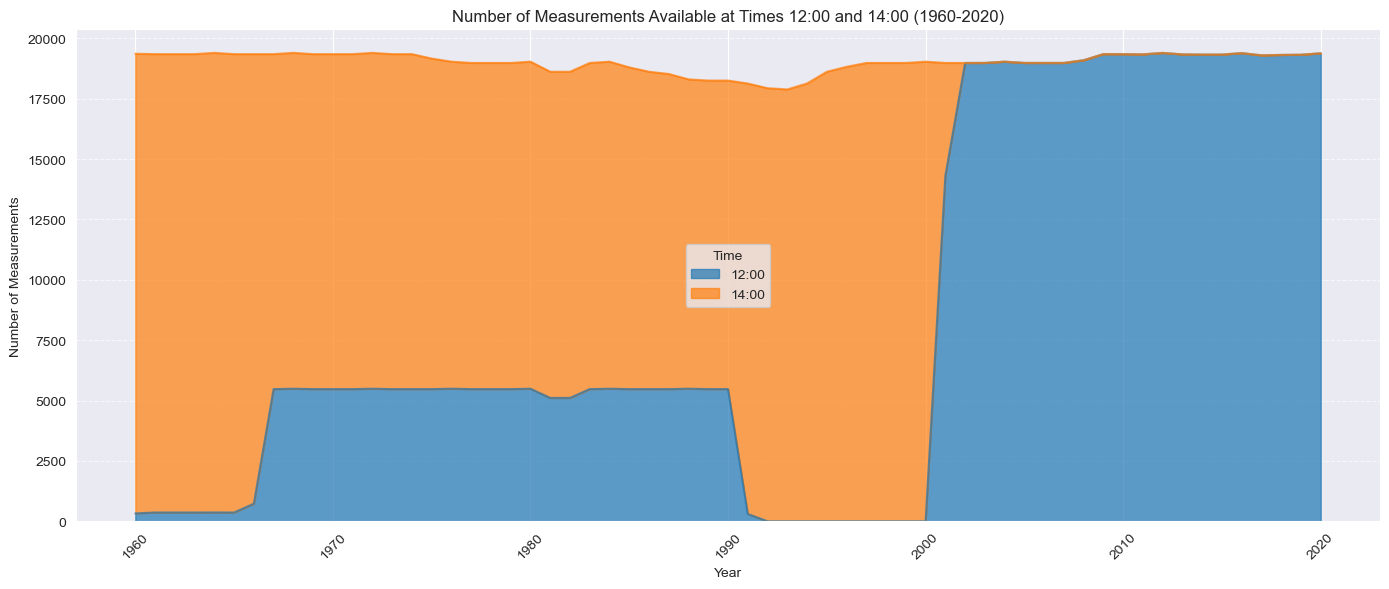

In [23]:
time_12 = filtered_data[filtered_data['time'] == 12].groupby('year').size()
time_14 = filtered_data[filtered_data['time'] == 14].groupby('year').size()

counts_df = pd.DataFrame({'12:00': time_12, '14:00': time_14})

plt.figure(figsize=(14, 6))
counts_df.plot(kind='area', stacked=True, alpha=0.7, ax=plt.gca())
plt.title('Number of Measurements Available at Times 12:00 and 14:00 (1960-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Measurements')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Time')
plt.show()

C:\Users\dadoi\AppData\Local\Temp\ipykernel_1880\3158365642.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['month'] = df['date'].dt.month


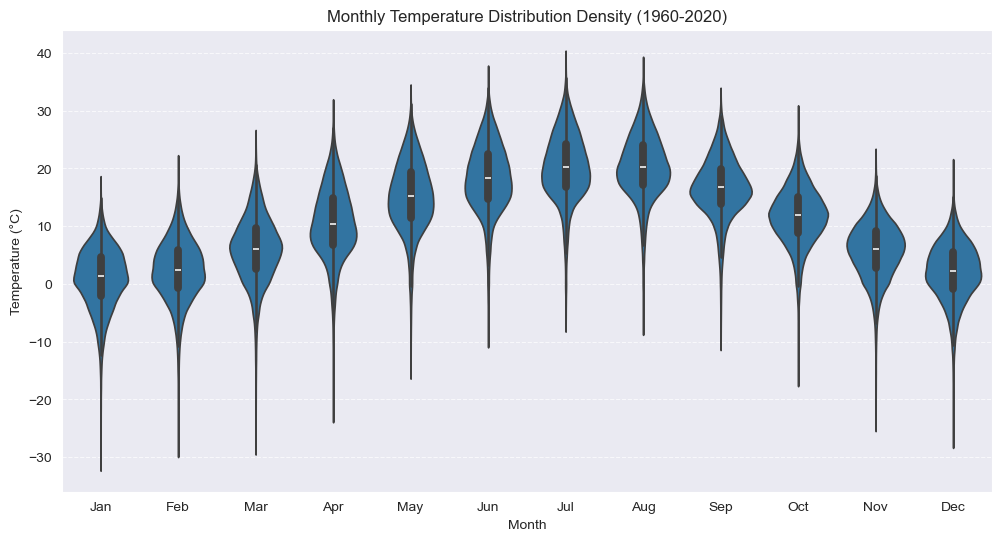

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
filtered_data['month'] = df['date'].dt.month

plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_data, x='month', y='temp')
plt.title('Monthly Temperature Distribution Density (1960-2020)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

TypeError: unsupported operand type(s) for -: 'list' and 'int'

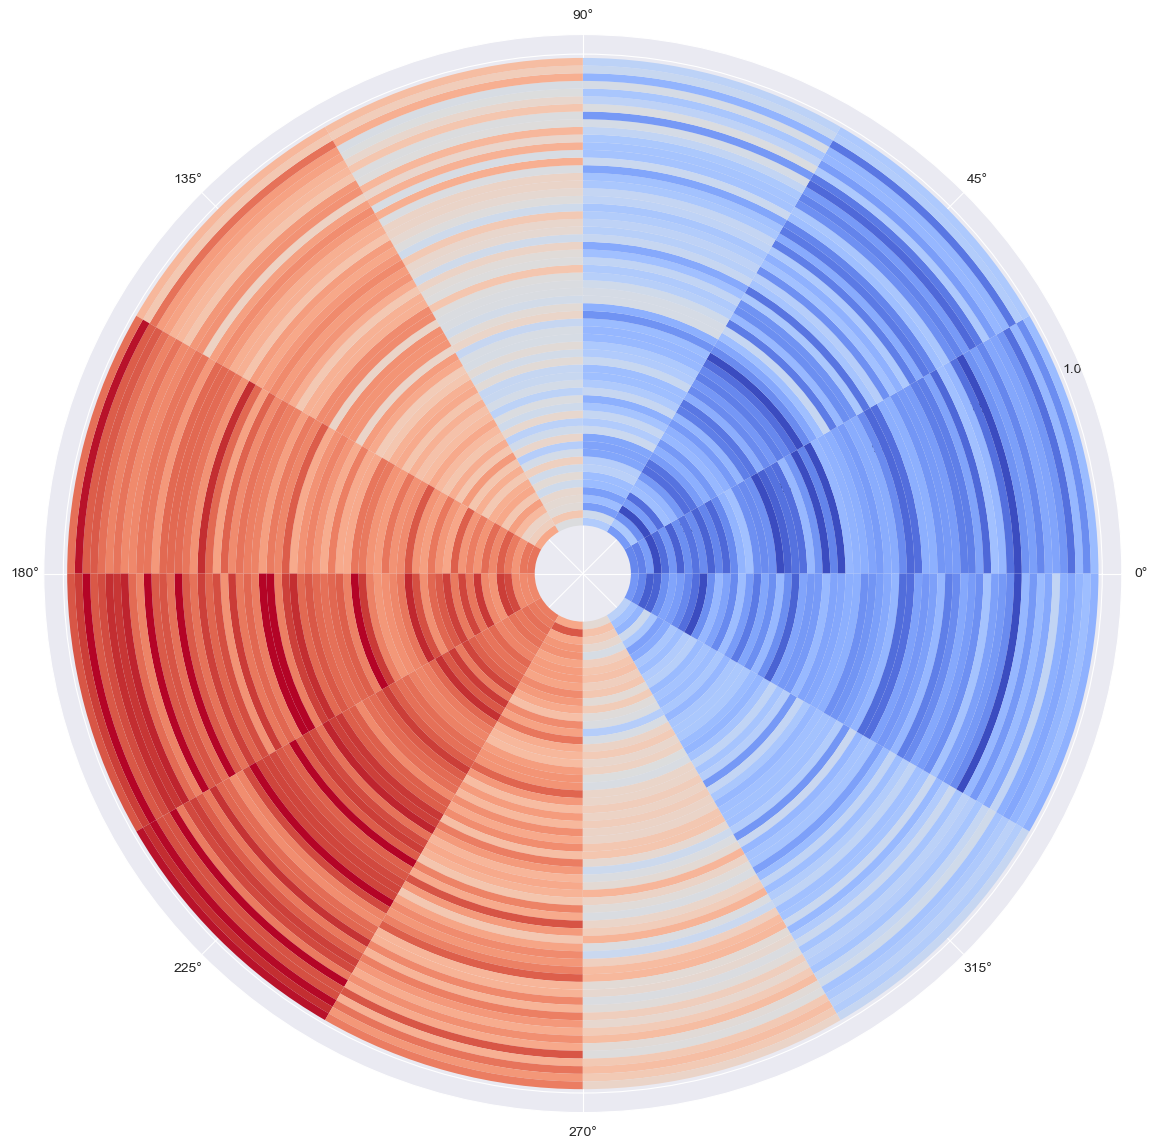

In [30]:
from matplotlib.colors import Normalize

monthly_avg = filtered_data.groupby(['year', 'month'])['temp'].mean().reset_index()
fig, ax = plt.subplots(figsize=(14, 14), subplot_kw={'projection': 'polar'})


temp_min = np.percentile(monthly_avg['temp'], 1)
temp_max = np.percentile(monthly_avg['temp'], 99)
cmap = plt.cm.coolwarm
norm = Normalize(vmin=temp_min, vmax=temp_max)
years = sorted(monthly_avg['year'].unique())
n_years = len(years)

all_angles = []
all_radii = []
all_temps = []

for year in years:
    # Get data for this year
    year_data = monthly_avg[monthly_avg['year'] == year]

    # Only use years with complete data
    if len(year_data) < 12:
        continue

    # Calculate radius based on year index (outer rings are more recent years)
    year_idx = np.where(years == year)[0][0]
    radius = 0.1 + year_idx * (0.9/n_years)

    # For each month (0=Jan at bottom, going clockwise)
    for month in range(1, 13):
        month_data = year_data[year_data['month'] == month]
        if not month_data.empty:
            # Create start and end angles for this month's segment
            start_angle = (month-1) * (2*np.pi/12)
            end_angle = month * (2*np.pi/12)

            # Get the temperature
            temp = month_data['temp'].values[0]

            # Store the values (we'll use these for bulk plotting)
            all_angles.append([start_angle, end_angle])
            all_radii.append(radius)
            all_temps.append(temp)

for angles, radius, temp in zip(all_angles, all_radii, all_temps):
    start_angle, end_angle = angles
    color = cmap(norm(temp))
    width = 0.9/n_years
    ax.bar(
        (start_angle + end_angle)/2,
        width,
        width=end_angle-start_angle,
        bottom=radius-width/2,
        color=color,
        edgecolor=None,
        linewidth=0
    )

label_years = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
for target_year in label_years:
    # Find the closest year in the data to the target year
    if len(years) > 0:  # Make sure years array is not empty
        closest_year_idx = np.argmin(np.abs(years - target_year))
        closest_year = years[closest_year_idx]

        # Only label if the closest year is within 2 years of target
        if abs(closest_year - target_year) <= 2:
            radius = 0.1 + closest_year_idx * (0.9/n_years)
            ax.text(np.pi/6, radius, str(closest_year), ha='center', va='center', fontsize=15)
# Add month labels around the outside
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_angles = np.linspace(0, 2*np.pi, 12, endpoint=False) + np.pi/12
for name, angle in zip(month_names, month_angles):
    ax.text(angle, 1.05, name, ha='center', va='center', fontsize=12, fontweight='bold')



# Remove radial and angular gridlines and ticks
ax.grid(False)
ax.set_yticklabels([])
ax.set_xticklabels([])


# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=0.1, orientation='vertical', shrink=0.8)
cbar.set_label('Temperature (°C)', rotation=270, labelpad=20, fontsize=12)


# Set the title with year range
plt.title('Monthly Temperatures (1960-2020)', fontsize=16, y=1.08)
plt.tight_layout()
plt.show()

In [31]:
# Calculate yearly statistics for all months combined
yearly_stats = filtered_data.groupby('year')['temp'].agg(['mean', 'std', 'median'])
yearly_stats['SME'] = yearly_stats['mean'].rolling(5).mean()


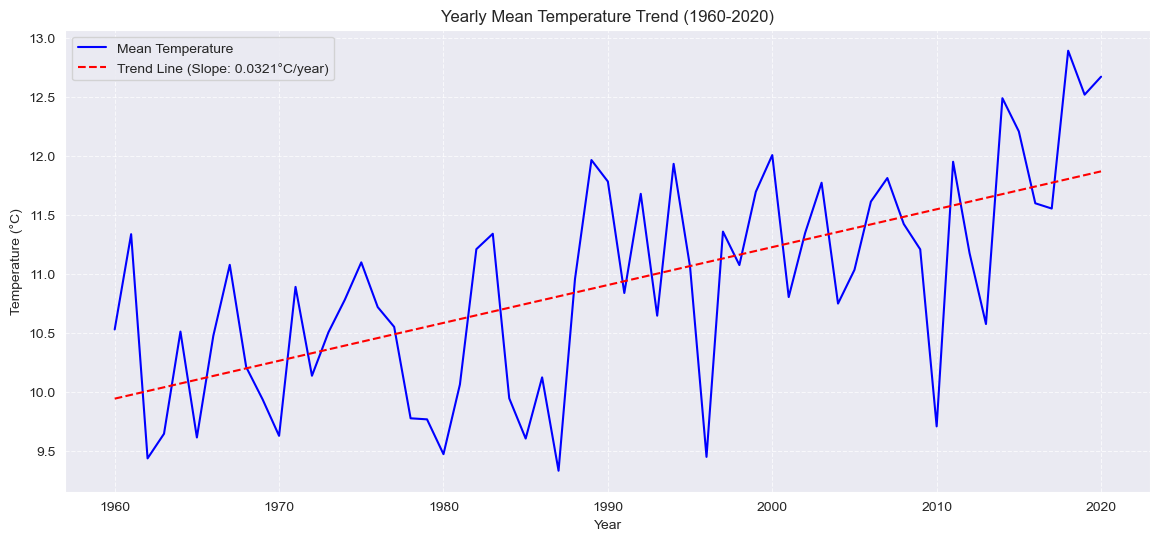

In [32]:
0.plt.figure(figsize=(14, 6))
plt.plot(yearly_stats.index, yearly_stats['mean'], 'b-', label='Mean Temperature')
#plt.plot(yearly_stats.index, yearly_stats['SME'], label='Simple moving average (5 y) Temperature')

# Add a trend line
z = np.polyfit(yearly_stats.index, yearly_stats['mean'], 1)
p = np.poly1d(z)
plt.plot(yearly_stats.index, p(yearly_stats.index), "r--", label=f'Trend Line (Slope: {z[0]:.4f}°C/year)')
plt.title('Yearly Mean Temperature Trend (1960-2020)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [33]:
selected_month = 6
monthly_data = filtered_data[filtered_data['month'] == selected_month]
monthly_stats = monthly_data.groupby('year')['temp'].agg(['mean', 'std', 'median'])


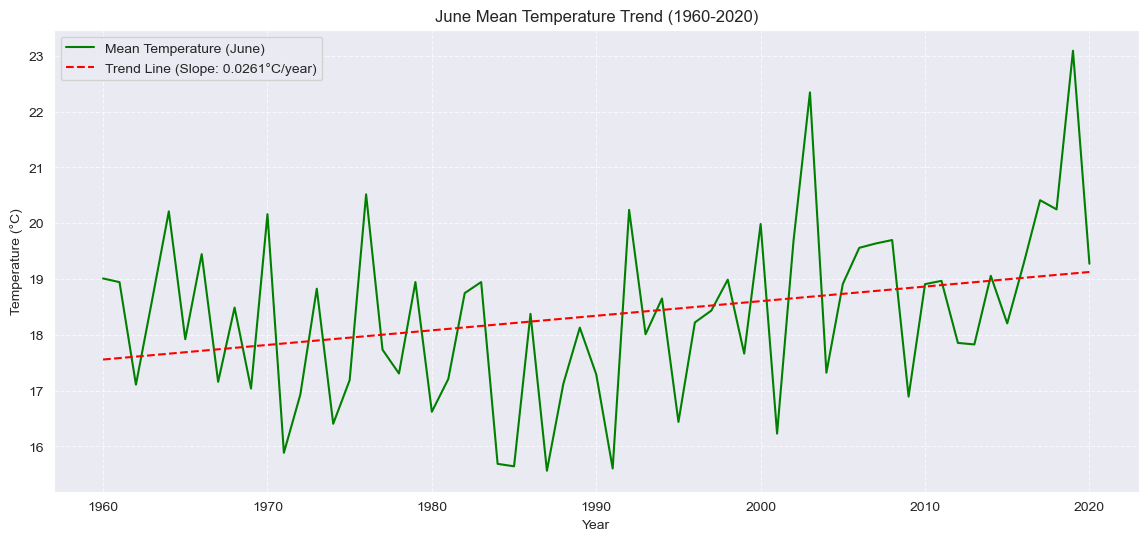

In [34]:
plt.figure(figsize=(14, 6))
plt.plot(monthly_stats.index, monthly_stats['mean'], 'g-', label=f'Mean Temperature (June)')

z = np.polyfit(monthly_stats.index, monthly_stats['mean'], 1)
p = np.poly1d(z)


plt.plot(monthly_stats.index, p(monthly_stats.index), "r--", label=f'Trend Line (Slope: {z[0]:.4f}°C/year)')
plt.title('June Mean Temperature Trend (1960-2020)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()